In [1]:
from logicqubit.logic import *

logicqubit-gpu version 1.2.8


In [2]:
# Uf|x,y> = |x,y+f(x)>
# Uf|x>(|0>-|1>) = |x>|0+f(x)>+|x>|1+f(x)>
# p/ f(x)=0 -> |x,y>, f(x)=1 -> -1|x,y>
# = (-1)^f(x)|x,y>

def qft(qr, n):
    for i in range(n):
        for j in range(i):
            logicQuBit.CU1(qr[j], qr[i], pi/float(2**(i-j)))
        logicQuBit.H(qr[i])
        
def iqft(qr, n): # transformada quântica de Fourier inversa
    for i in range(n):
        for j in range(i):
            logicQuBit.CU1(qr[j], qr[i], -pi/float(2**(i-j)))
        logicQuBit.H(qr[i])
        
def swap(s1, s2):
    logicQuBit.CX(s1, s2)
    logicQuBit.CX(s2, s1)
    logicQuBit.CX(s1, s2)

In [3]:
# Altera a probalidade dos estados em y
logicQuBit  = LogicQuBit(7)

x1 = Qubit()
x2 = Qubit()
x3 = Qubit()
x4 = Qubit()

y1 = Qubit()
y2 = Qubit()
y3 = Qubit()

# |000>+|001>+|010>+|011>+|100>+|101>+|110>+|111>
x1.H()
x2.H()
x3.H()
x4.H()

# Hx|x,y> = |000,000>+|001,000>+|010,000>+|011,000>+|100,000>+|101,000>+|110,000>+|111,000>

# oracle
#y1.X() # |001>

# p/ y=000 -> nada |000,000>+|001,000>+|010,000>+|011,000>+|100,000>+|101,000>+|110,000>+|111,000>

# p/ y=010 -> y2.CX(x1) |000,000>+|001,010>+|010,000>+|011,010>+|100,000>+|101,010>+|110,000>+|111,010>
y2.CX(x2)

# p/ y=100 -> X(x2) |010,000>+|011,010>+|000,000>+|001,010>+|110,000>+|111,010>+|100,000>+|101,010>
# p/ y=100 -> y3.CX(x2) |010,100>+|011,110>+|000,000>+|001,010>+|110,100>+|111,110>+|100,000>+|101,010>
# p/ y=100 -> X(x2) |000,100>+|001,110>+|010,000>+|011,010>+|100,100>+|101,110>+|110,000>+|111,010>
x2.X() # not x2
y3.CX(x3)
x2.X()

iqft([x1,x2,x3,x4],3)

In [5]:
#x1.PrintState()

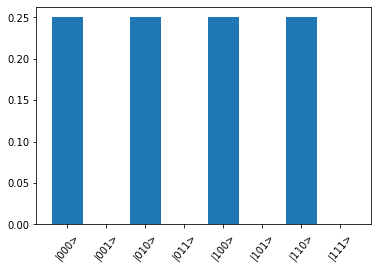

In [6]:
logicQuBit.Measure([x1,x2,x3])
#logicQuBit.Measure([y1,y2,y3])
logicQuBit.Plot()

In [7]:
# x  y
# 0  0011
# 1  0101

logicQuBit  = LogicQuBit(6)

x1 = Qubit()

y1 = Qubit()
y2 = Qubit()
y3 = Qubit()
y4 = Qubit()

x1.H()

y2.CX(x1)
y3.CX(x1)
y3.X()
y4.X()

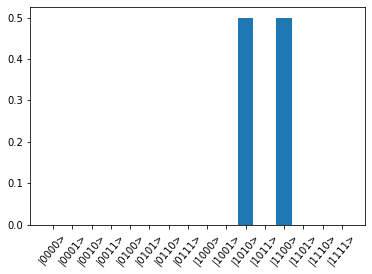

In [8]:
res=logicQuBit.Measure([y1,y2,y3,y4])
logicQuBit.Plot()